In [79]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [134]:
kju = pd.read_csv('KJUAppearances.csv')
kju = kju.iloc[:,0:3]

In [135]:
kju.head()

,DATE,APPEARANCE,ACCOMPANY
0,2019.03.28,3.27 제5차 중대장·중대정치지도원대회 참가자들과 기념촬영,"리명수,김수길,리영길,노광철"
1,2019.03.27,3.25∼26 제5차 중대장·중대정치지도원대회 지도,"리명수,김수길,리영길,노광철"
2,2019.03.10,3.10 최고인민회의 제14기 대의원선거 참가,NaN
3,2019.03.03,"3.2 호치민 주석 묘 참배, 영웅열사추모비 헌화","김영철,리수용,김평해,오수용,리용호,노광철,김여정,최선희"
4,2019.03.02,"3.1 베트남 국가주석과 상봉·정상회담, 베트남 총리 및 국회의장과 상봉·면담, 만...","김영철,리수용,김평해,오수용,리용호,노광철,김여정,최선희,김명길"


In [136]:
kju['DATE'] =  pd.to_datetime(kju['DATE'], format='%Y.%m.%d')
#kju = kju[kju['DATE'] < '2019-01-01']

In [137]:
kju = kju.sort_values(by=['DATE'], ascending=True)

In [138]:
kju = kju.reset_index(drop=True)
kju.head()

,DATE,APPEARANCE,ACCOMPANY
0,2012-01-01,서울류경수 탱크사단 방문,"리영호,장성택,김정각,황병서,박재경,현철해"
1,2012-01-01,금수산기념궁전 방문,"김영남,최영림,리영호,김경희,김영춘,김기남,최태복,양형섭,강석주,장성택,김정각,김양..."
2,2012-01-02,은하수음악회 관람,"김영남,최영림,리영호,김영춘,김국태,김기남,최태복,양형섭,리용무,오극렬,강석주,변영..."
3,2012-01-11,인민군 군인들이 맡고 있는 여러 건설대상 시찰,NaN
4,2012-01-15,음악무용종합공연 관람,"리영호,김영춘,장성택,김정각,김명국,박재경"


In [139]:
results = kju['DATE'].diff()

In [140]:
gaps = results.dt.days

In [141]:
kju['GAP']= gaps

In [142]:
gaps = gaps.dropna()

In [143]:
len(gaps)

1025

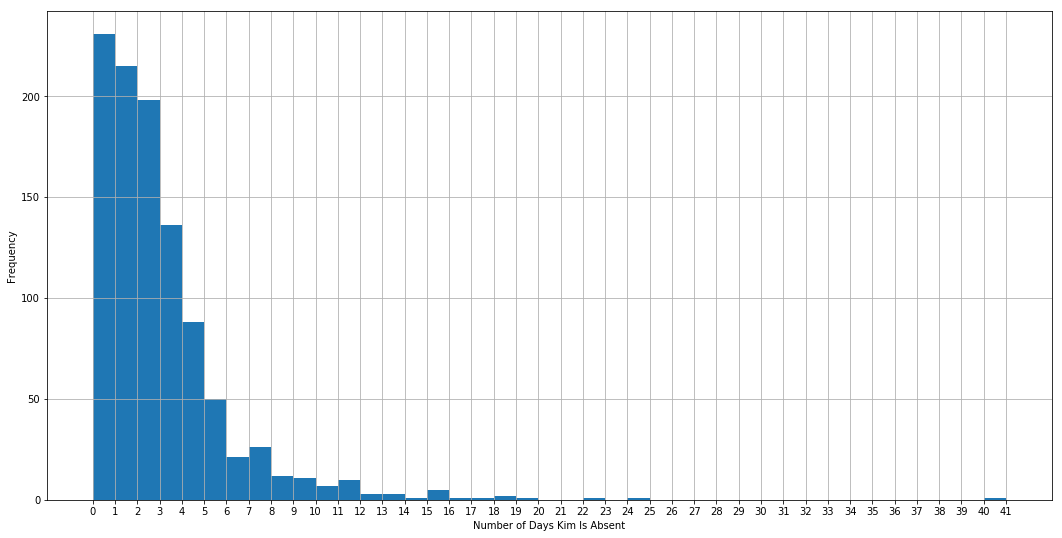

In [144]:
import numpy as np

plt.figure(figsize=(18,9))
plt.xticks(np.arange(min(gaps), max(gaps)+1, 1.0))
plt.xlabel('Number of Days Kim Is Absent')
plt.ylabel('Frequency')
gaps.hist(bins=41)

In [145]:
gaps[gaps>14]

81      24.0
130     15.0
154     18.0
495     41.0
871     15.0
877     15.0
880     15.0
925     18.0
926     22.0
984     15.0
998     19.0
1015    16.0
1024    17.0
Name: DATE, dtype: float64

In [146]:
kju.loc[kju['GAP']>14,:].sort_values(by='GAP', ascending=False)

,DATE,APPEARANCE,ACCOMPANY,GAP
495,2014-10-14,위성과학자주택지구 및 국가과학원 자연에너지연구소 시찰,"황병서,최태복,최룡해,한광상,김정관",41.0
81,2012-07-01,능라인민유원지 현지지도,"장성택,박춘홍,마원춘",24.0
926,2018-03-28,중국 비공식 방문,"리설주,최룡해,박광호,리수용,김영철,리용호,조용원,김성남,김병호,지재룡",22.0
998,2018-10-30,삼지연군 읍지구 건설현장 현지지도,"최룡해,조용원,김용수,마원춘",19.0
154,2013-01-19,대성산종합병원 방문,"최영림,최룡해,박도춘,김경옥,리재일,박태성,황병서,마원춘,허환철,전창복",18.0
925,2018-03-06,南 특사대표단 성원들 접견 및 만찬,"리설주,김영철,김여정",18.0
1024,2019-03-27,3.25∼26 제5차 중대장·중대정치지도원대회 지도,"리명수,김수길,리영길,노광철",17.0
1015,2019-01-24,1.23 제2차 조미고위급회담 대표단 만나 방미정형보고 청취,김영철,16.0
130,2012-10-29,김일성군사종합대학 교직원들과 기념사진 촬영,"최룡해,현영철,김정각,장성택,리용무,김영춘,현철해,김원홍,리명수,오극렬,주규창,려춘석",15.0
871,2017-07-05,대륙간탄도미사일 화성 14형 시험발사 현지지도 공개활동,"리병철,김락겸,김정식,정승일,장창하,전일호,유진,조용원",15.0


In [147]:
len(gaps[gaps<=5])/len(gaps)

0.895609756097561

In [151]:
len(gaps[gaps>=20])/len(gaps)

0.002926829268292683

In [152]:
kju['WEEKDAY'] = kju['DATE'].dt.weekday_name

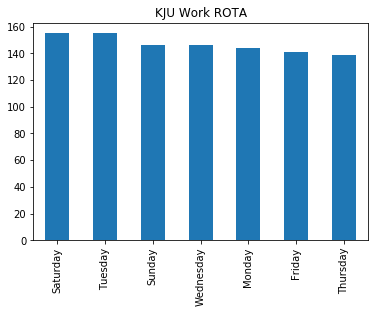

In [164]:
kju['WEEKDAY'].value_counts().plot(kind='bar', title='KJU Work ROTA')

In [154]:
kju = kju.drop([len(kju)-1])

In [155]:
mon_name = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

In [156]:
kju['MONTH'] = kju['DATE'].map(lambda d: mon_name[d.month-1])

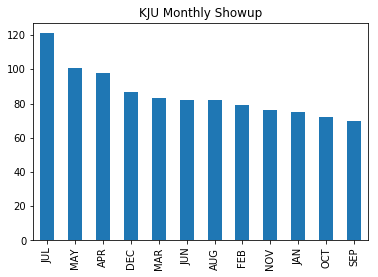

In [162]:
kju['MONTH'].value_counts().plot(kind='bar', title='KJU Monthly Showup')

In [158]:
kju_solo = kju[kju['ACCOMPANY'].isnull()]

In [159]:
kju_solo.shape

(127, 6)

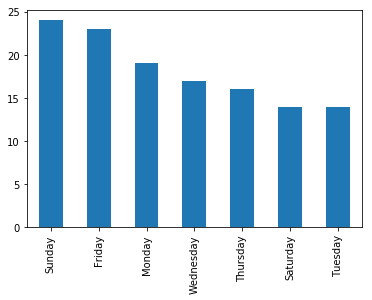

In [116]:
kju_solo['WEEKDAY'].value_counts().plot(kind='bar')

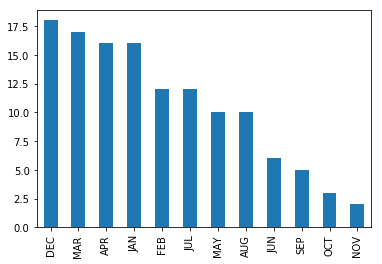

In [117]:
kju_solo['MONTH'].value_counts().plot(kind='bar')

In [173]:
kju['FUNC_NUM'] = kju['ACCOMPANY'].apply(lambda officials: 0 if officials is np.NaN else len(officials.split(',')))

In [174]:
kju.head()

,DATE,APPEARANCE,ACCOMPANY,GAP,WEEKDAY,MONTH,FUNC_NUM
0,2012-01-01,서울류경수 탱크사단 방문,"리영호,장성택,김정각,황병서,박재경,현철해",NaN,Sunday,JAN,6
1,2012-01-01,금수산기념궁전 방문,"김영남,최영림,리영호,김경희,김영춘,김기남,최태복,양형섭,강석주,장성택,김정각,김양...",0.0,Sunday,JAN,21
2,2012-01-02,은하수음악회 관람,"김영남,최영림,리영호,김영춘,김국태,김기남,최태복,양형섭,리용무,오극렬,강석주,변영...",1.0,Monday,JAN,25
3,2012-01-11,인민군 군인들이 맡고 있는 여러 건설대상 시찰,NaN,9.0,Wednesday,JAN,0
4,2012-01-15,음악무용종합공연 관람,"리영호,김영춘,장성택,김정각,김명국,박재경",4.0,Sunday,JAN,6


In [175]:
import seaborn as sns

Text(0.5,1,'How many pour souls are dragged around w/KJU')

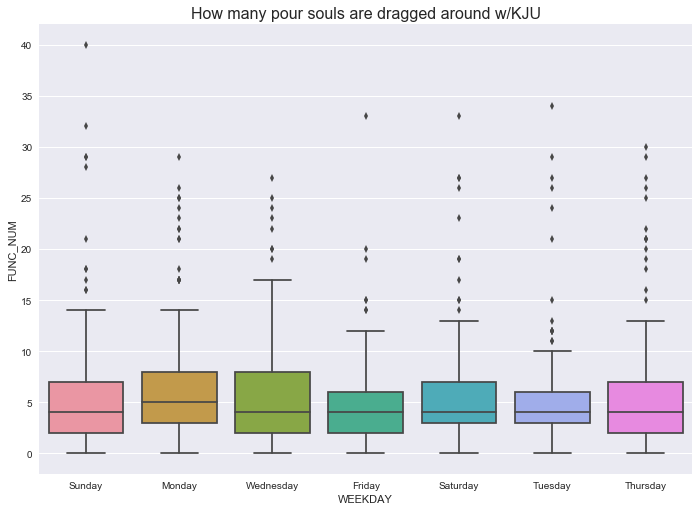

In [181]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x='WEEKDAY', y='FUNC_NUM', data=kju)
plt.title('How many pour souls are dragged around w/KJU', fontsize=16)

Text(0.5,1,'How many pour souls are dragged around w/KJU')

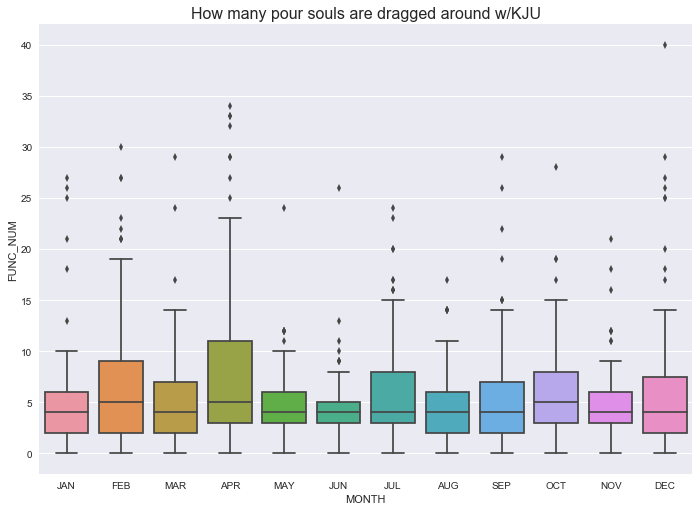

In [182]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x='MONTH', y='FUNC_NUM', data=kju)
plt.title('How many pour souls are dragged around w/KJU', fontsize=16)

In [111]:
names_column = kju['ACCOMPANY'].dropna()

In [23]:
name_list1 = names_column.str.split(',')

In [6]:
name_list1

0      [최룡해, 박광호, 리수용, 김평해, 태종수, 오수용, 안정수, 박태성, 김영철, ...
2                                             [김영철, 조용원]
3      [리설주, 김영남, 최룡해, 박봉주, 박광호, 양형섭, 리수용, 김평해, 태종수, ...
4                                        [리설주, 오수용, 조용원]
5                                             [오수용, 조용원]
6                                   [리설주, 박태성, 최동명, 조용원]
7                                             [박태성, 조용원]
8                                        [박태성, 최동명, 조용원]
10     [최룡해, 박광호, 김평해, 태종수, 오수용, 안정수, 박태성, 최휘, 박태덕, 김여정]
11          [최룡해, 박광호, 김평해, 태종수, 오수용, 안정수, 박태성, 최휘, 박태덕]
14                        [태종수, 노광철, 장창하, 전일호, 홍승무, 홍영칠]
17                        [태종수, 노광철, 장창하, 전일호, 홍승무, 홍영칠]
18                                  [최룡해, 김용수, 조용원, 마원춘]
19                        [최룡해, 김용수, 조용원, 리상원, 마원춘, 양명철]
20                             [최룡해, 김용수, 조용원, 김웅철, 마원춘]
21                                   [최룡해, 홍영칠, 조용원, 유진]
22                                   [장창하, 전일호, 조용원, 유진]
23                             

In [8]:
name_list2 = name_list1.values.tolist()

In [9]:
name_list2

[['최룡해', '박광호', '리수용', '김평해', '태종수', '오수용', '안정수', '박태성', '김영철', '최휘', '박태덕'],
 ['김영철', '조용원'],
 ['리설주',
  '김영남',
  '최룡해',
  '박봉주',
  '박광호',
  '양형섭',
  '리수용',
  '김평해',
  '태종수',
  '오수용',
  '안정수',
  '박태성',
  '로두철',
  '리용호',
  '최부일',
  '최휘',
  '박태덕',
  '임철웅',
  '조연준',
  '리만건',
  '김수길',
  '정경택',
  '노광철',
  '김철만',
  '최영림',
  '리용무',
  '오극렬',
  '김정각',
  '리명수',
  '박영식'],
 ['리설주', '오수용', '조용원'],
 ['오수용', '조용원'],
 ['리설주', '박태성', '최동명', '조용원'],
 ['박태성', '조용원'],
 ['박태성', '최동명', '조용원'],
 ['최룡해', '박광호', '김평해', '태종수', '오수용', '안정수', '박태성', '최휘', '박태덕', '김여정'],
 ['최룡해', '박광호', '김평해', '태종수', '오수용', '안정수', '박태성', '최휘', '박태덕'],
 ['태종수', '노광철', '장창하', '전일호', '홍승무', '홍영칠'],
 ['태종수', '노광철', '장창하', '전일호', '홍승무', '홍영칠'],
 ['최룡해', '김용수', '조용원', '마원춘'],
 ['최룡해', '김용수', '조용원', '리상원', '마원춘', '양명철'],
 ['최룡해', '김용수', '조용원', '김웅철', '마원춘'],
 ['최룡해', '홍영칠', '조용원', '유진'],
 ['장창하', '전일호', '조용원', '유진'],
 ['오수용', '박태성', '조용원'],
 ['오수용', '박태성', '조용원'],
 ['박봉주', '오수용', '조용원'],
 ['오수용', '박태성', '홍영칠', '조용원', '유진'],
 ['리설주', '김

In [13]:
final_list = np.concatenate(name_list2)

In [14]:
final_list

array(['최룡해', '박광호', '리수용', ..., '황병서', '박재경', '현철해'],
      dtype='<U3')

In [15]:
final_series = pd.Series(final_list).dropna()

In [24]:
final_series

0       리영호
1       장성택
2       김정각
3       황병서
4       박재경
5       현철해
6       김영남
7       최영림
8       리영호
9       김경희
10      김영춘
11      김기남
12      최태복
13      양형섭
14      강석주
15      장성택
16      김정각
17      김양건
18      김영일
19      박도춘
20      최룡해
21      태종수
22      김평해
23      문경덕
24      주규창
25      우동측
26      김창섭
27      김영남
28      최영림
29      리영호
       ... 
5350    리용호
5351    최부일
5352     최휘
5353    박태덕
5354    임철웅
5355    조연준
5356    리만건
5357    김수길
5358    정경택
5359    노광철
5360    김철만
5361    최영림
5362    리용무
5363    오극렬
5364    김정각
5365    리명수
5366    박영식
5367    김영철
5368    조용원
5369    최룡해
5370    박광호
5371    리수용
5372    김평해
5373    태종수
5374    오수용
5375    안정수
5376    박태성
5377    김영철
5378     최휘
5379    박태덕
Length: 5380, dtype: object

In [25]:
final_series.value_counts()

최룡해    376
황병서    362
장성택    158
김기남    143
마원춘    134
조용원    131
리영길    125
김양건    111
최태복    108
한광상    106
김원홍     97
리재일     94
김평해     86
박봉주     84
박정천     83
박태성     81
현영철     80
리병철     79
박도춘     79
장정남     76
리설주     76
홍영칠     73
오수용     73
김경희     72
김영남     72
서홍찬     71
김영철     67
문경덕     66
김영춘     62
박영식     61
      ... 
심상대      1
강영철      1
리응원      1
변영립      1
김정순      1
최경성      1
전병호      1
정경택      1
박구호      1
배익주      1
강종관      1
김태히      1
강필훈      1
김영복      1
리주오      1
리기석      1
로성실      1
리경심      1
리선호      1
장혁       1
동영일      1
천재련      1
진철수      1
백세봉      1
주순옥      1
김용남      1
김영호      1
양명철      1
김동일      1
김차돌      1
Length: 219, dtype: int64

In [26]:
names_list = names_column.astype('str').apply(lambda names: names.split(','))

In [27]:
master_list = names_list.values.tolist()

In [28]:
final_list = np.concatenate(master_list)

In [29]:
final_list

array(['리영호', '장성택', '김정각', ..., '김영철', '최휘', '박태덕'], 
      dtype='<U3')

In [30]:
final_series = pd.Series(final_list).dropna()

In [31]:
final_series.value_counts(ascending=False).head(30)

최룡해    376
황병서    362
장성택    158
김기남    143
마원춘    134
조용원    131
리영길    125
김양건    111
최태복    108
한광상    106
김원홍     97
리재일     94
김평해     86
박봉주     84
박정천     83
박태성     81
현영철     80
리병철     79
박도춘     79
장정남     76
리설주     76
홍영칠     73
오수용     73
김경희     72
김영남     72
서홍찬     71
김영철     67
문경덕     66
김영춘     62
박영식     61
dtype: int64

In [35]:
kju.head()

,DATE,APPEARANCE,ACCOMPANY
0,2018.02.16,김정일 생일 76주년 경축 금수산태양궁전 참배,"최룡해,박광호,리수용,김평해,태종수,오수용,안정수,박태성,김영철,최휘,박태덕"
1,2018.02.13,삼지연관현악단 만나 기념사진 촬영,NaN
2,2018.02.13,北 고위급대표단 만나 활동정형 보고 청취,"김영철,조용원"
3,2018.02.08,조선인민군 창건 70돌 경축 열병식 참석,"리설주,김영남,최룡해,박봉주,박광호,양형섭,리수용,김평해,태종수,오수용,안정수,박태..."
4,2018.02.04,새형의 평양무궤도전차 시운전 현지지도,"리설주,오수용,조용원"


In [42]:
kju2 = kju.replace(np.nan, 'None', regex=True)

In [44]:
kju2.head()

,DATE,APPEARANCE,ACCOMPANY
0,2018.02.16,김정일 생일 76주년 경축 금수산태양궁전 참배,"최룡해,박광호,리수용,김평해,태종수,오수용,안정수,박태성,김영철,최휘,박태덕"
1,2018.02.13,삼지연관현악단 만나 기념사진 촬영,None
2,2018.02.13,北 고위급대표단 만나 활동정형 보고 청취,"김영철,조용원"
3,2018.02.08,조선인민군 창건 70돌 경축 열병식 참석,"리설주,김영남,최룡해,박봉주,박광호,양형섭,리수용,김평해,태종수,오수용,안정수,박태..."
4,2018.02.04,새형의 평양무궤도전차 시운전 현지지도,"리설주,오수용,조용원"


In [56]:
all_folks = []
for people in kju2.ACCOMPANY: 
    all_folks.extend(people.split(','))
folks = pd.unique(all_folks)

In [59]:
zero_matrix = np.zeros((len(kju2), len(folks)))
dummies = pd.DataFrame(zero_matrix, columns=folks)

In [60]:
for i, functionary in enumerate(kju2.ACCOMPANY): 
    indices = dummies.columns.get_indexer(functionary.split(','))
    dummies.iloc[i, indices]=1

In [114]:
kju3 = kju2.join(dummies)

In [115]:
kju3.head()

,DATE,APPEARANCE,ACCOMPANY,최룡해,박광호,리수용,김평해,태종수,오수용,안정수,...,권혁봉,김수학,심상대,남승우,리두성,정명도,우동측,전병호,김락희,변영립
0,2018.02.16,김정일 생일 76주년 경축 금수산태양궁전 참배,"최룡해,박광호,리수용,김평해,태종수,오수용,안정수,박태성,김영철,최휘,박태덕",1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018.02.13,삼지연관현악단 만나 기념사진 촬영,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018.02.13,北 고위급대표단 만나 활동정형 보고 청취,"김영철,조용원",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018.02.08,조선인민군 창건 70돌 경축 열병식 참석,"리설주,김영남,최룡해,박봉주,박광호,양형섭,리수용,김평해,태종수,오수용,안정수,박태...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018.02.04,새형의 평양무궤도전차 시운전 현지지도,"리설주,오수용,조용원",0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
kju4 = pd.DataFrame(kju2.ACCOMPANY.str.split(',').tolist(), index=[kju.DATE, kju.APPEARANCE]).stack()
kju4 = kju4.reset_index()[['DATE','APPEARANCE',0]] 
kju4.columns = ['DATE', 'APPEARANCE', 'FUNC']

In [117]:
kju4

,DATE,APPEARANCE,FUNC
0,2018.02.16,김정일 생일 76주년 경축 금수산태양궁전 참배,최룡해
1,2018.02.16,김정일 생일 76주년 경축 금수산태양궁전 참배,박광호
2,2018.02.16,김정일 생일 76주년 경축 금수산태양궁전 참배,리수용
3,2018.02.16,김정일 생일 76주년 경축 금수산태양궁전 참배,김평해
4,2018.02.16,김정일 생일 76주년 경축 금수산태양궁전 참배,태종수
5,2018.02.16,김정일 생일 76주년 경축 금수산태양궁전 참배,오수용
6,2018.02.16,김정일 생일 76주년 경축 금수산태양궁전 참배,안정수
7,2018.02.16,김정일 생일 76주년 경축 금수산태양궁전 참배,박태성
8,2018.02.16,김정일 생일 76주년 경축 금수산태양궁전 참배,김영철
9,2018.02.16,김정일 생일 76주년 경축 금수산태양궁전 참배,최휘


In [118]:
kju4.tail()

,DATE,APPEARANCE,FUNC
5489,2012.01.01,서울류경수 탱크사단 방문,김정각
5490,2012.01.01,서울류경수 탱크사단 방문,황병서
5491,2012.01.01,서울류경수 탱크사단 방문,박재경
5492,2012.01.01,서울류경수 탱크사단 방문,현철해
5493,NaN,NaN,None


In [121]:
kju4 = kju4.drop([5493])

In [122]:
kju4.tail()

,DATE,APPEARANCE,FUNC
5488,2012.01.01,서울류경수 탱크사단 방문,장성택
5489,2012.01.01,서울류경수 탱크사단 방문,김정각
5490,2012.01.01,서울류경수 탱크사단 방문,황병서
5491,2012.01.01,서울류경수 탱크사단 방문,박재경
5492,2012.01.01,서울류경수 탱크사단 방문,현철해
